In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [38]:
# 표 그릴 때 한국어 나오게 하는 거
# !pip install koreanize-matplotlib

In [39]:
import koreanize_matplotlib

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/ratings_train.txt", sep='\t')
test_df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/ratings_test.txt", sep='\t' )

In [3]:
train_df['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [4]:
train_df = train_df.dropna()
test_df = test_df.dropna()

# 정규표현식 re
- import re
- pattern = r'[가-힣0-9a-zA-Z]+' 한글, 숫자, 영어 대소문자만 추출
- matches = re.findall(pattern, data)

In [5]:
import re

In [6]:
def text_clean(x) :
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = " ".join(matches)
    return matches

In [7]:
train_df['document'] = train_df['document'].apply(text_clean)
test_df['document'] = test_df['document'].apply(text_clean)

In [8]:
train_X = train_df['document']
test_X = test_df['document']

In [9]:
train_y = train_df['label']
test_y = test_df['label']

카운터벡터화하기

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer()
train_X_cv = cv.fit_transform(train_X)
# fit_transform은 fit으로 모델을 만들고 transform으로 결과를 내는 건데 test에도 fit을 하면 test로 다시 fit을 하게 되는 거
# test_X_cv = cv.fit_transform(test_X)
test_X_cv = cv.transform(test_X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_X_cv, train_y, test_size = 0.4, random_state = 7)

In [14]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8213773792459749
              precision    recall  f1-score   support

           0       0.85      0.78      0.82     30158
           1       0.80      0.86      0.83     29840

    accuracy                           0.82     59998
   macro avg       0.82      0.82      0.82     59998
weighted avg       0.82      0.82      0.82     59998



In [15]:
test_pred = mnb.predict(test_X_cv)
print(accuracy_score(test_y, test_pred))
print(classification_report(test_y, test_pred))

0.8183691021461288
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     24826
           1       0.83      0.81      0.82     25171

    accuracy                           0.82     49997
   macro avg       0.82      0.82      0.82     49997
weighted avg       0.82      0.82      0.82     49997



# Konlpy의 Mecab을 이용해 형태소 분리

In [16]:
from konlpy.tag import Mecab
mecab = Mecab()

In [21]:
def tokenizer(text) :
    tokens = mecab.morphs(text)
    return tokens

In [22]:
tokenizer(train_df['document'][0])

['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']

In [31]:
words = train_df['document'].apply(tokenizer)

In [32]:
words

0                             [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1         [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 지, 않, 구나]
2                                   [너무, 재, 밓었다그래서보는것을추천한다]
3                  [교도소, 이야기, 구먼, 솔직히, 재미, 는, 없, 다, 평점, 조정]
4         [사이몬페그, 의, 익살, 스런, 연기, 가, 돋보였, 던, 영화, 스파이더맨, 에...
                                ...                        
149995                         [인간, 이, 문제지, 소, 는, 뭔, 죄, 인가]
149996                                   [평점, 이, 너무, 낮, 아서]
149997      [이게, 뭐, 요, 한국인, 은, 거들먹거리, 고, 필리핀, 혼혈, 은, 착하, 다]
149998      [청춘, 영화, 의, 최고봉, 방황, 과, 우울, 했, 던, 날, 들, 의, 자화상]
149999             [한국, 영화, 최초, 로, 수간, 하, 는, 내용, 이, 담긴, 영화]
Name: document, Length: 149995, dtype: object

In [35]:
whole_words = []
for i in words :
    ss = ''.join(i)
    for word in ss.split(',') :
        whole_words.append(word)

In [36]:
from nltk.probability import FreqDist
# 빈도수 확인
FreqDist(whole_words)

FreqDist({'': 617, '굿': 239, '최고': 162, '별로': 123, '쓰레기': 114, 'good': 110, '재미없다': 101, '재밌다': 97, '재밌어요': 81, '굳': 72, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

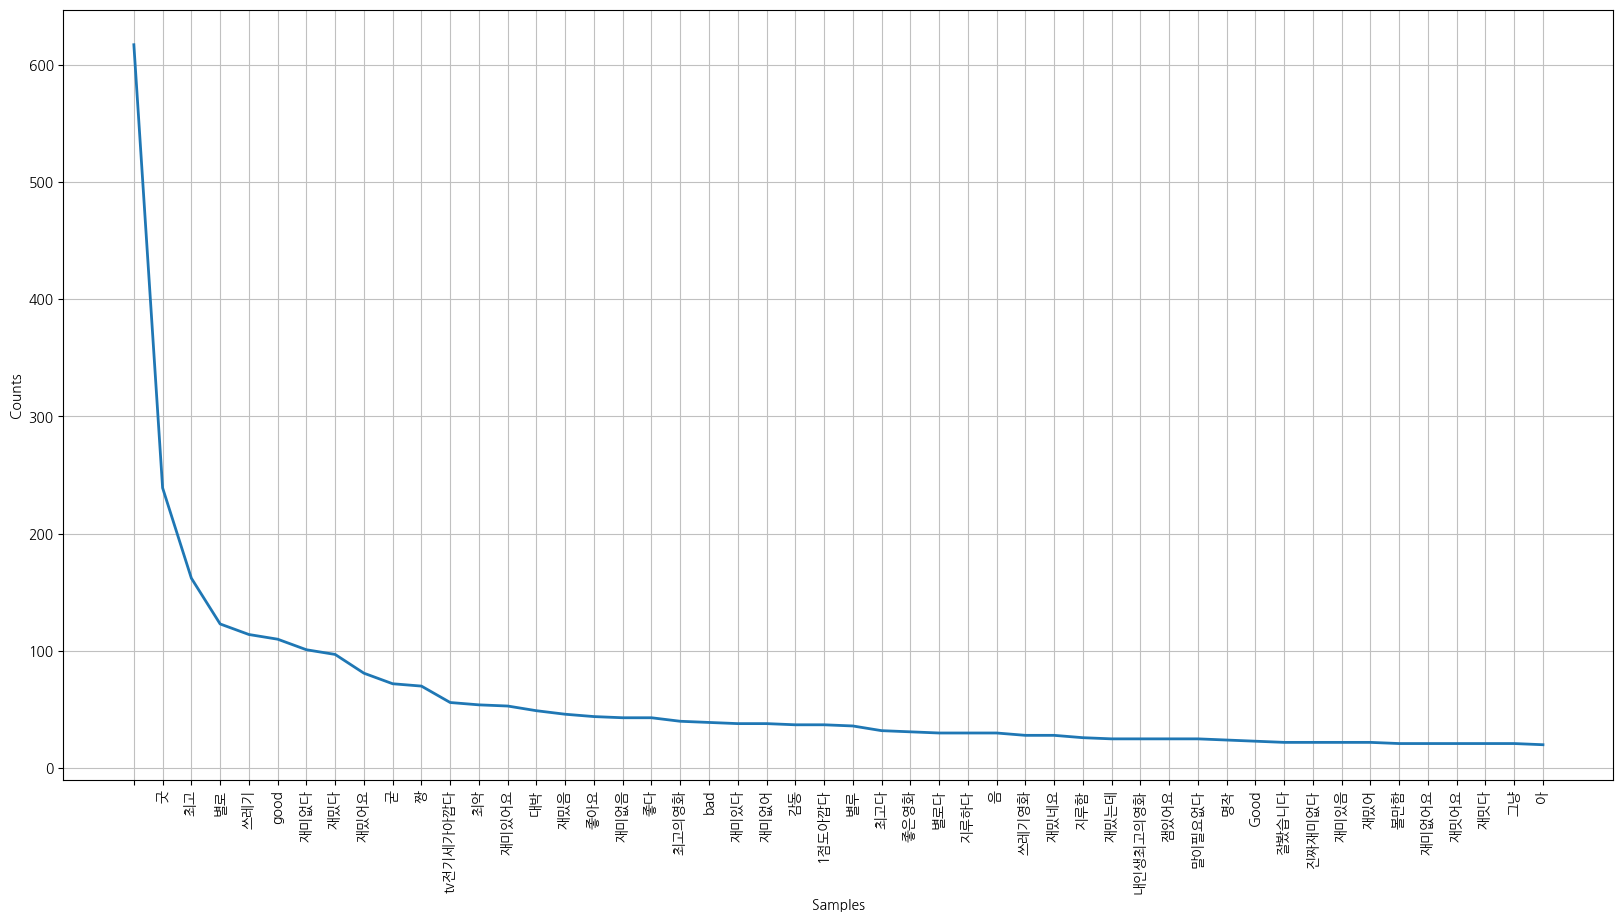

In [40]:
# 빈도수 그래프 그리기(50개만)
plt.figure(figsize = (20, 10))
FreqDist(whole_words).plot(50)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(tokenizer = tokenizer, max_df = 0.8, min_df = 3, ngram_range = (1,2))
train_X_cv = cv.fit_transform(train_X)
test_X_cv = cv.transform(test_X)

/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_X_cv, train_y, test_size = 0.4, random_state = 7)

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8581952731757725
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     30158
           1       0.86      0.85      0.86     29840

    accuracy                           0.86     59998
   macro avg       0.86      0.86      0.86     59998
weighted avg       0.86      0.86      0.86     59998



In [26]:
test_pred = mnb.predict(test_X_cv)
print(accuracy_score(test_y, test_pred))
print(classification_report(test_y, test_pred))

0.856471388283297
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     24826
           1       0.86      0.85      0.86     25171

    accuracy                           0.86     49997
   macro avg       0.86      0.86      0.86     49997
weighted avg       0.86      0.86      0.86     49997



## TfidfVectorizer : 단어의 중요도를 계산

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
documents = ['고양이가 나무 위에 있다', '나무 아래에 고양이가 있다']
c_vec = CountVectorizer()
sample = c_vec.fit_transform(documents)
print(c_vec.get_feature_names_out())
print(sample.toarray())

['고양이가' '나무' '아래에' '위에' '있다']
[[1 1 0 1 1]
 [1 1 1 0 1]]


In [43]:
documents = ['고양이가 나무 위에 있다', '나무 아래에 고양이가 있다']
t_vec = TfidfVectorizer()
t_sample = t_vec.fit_transform(documents)
print(t_vec.get_feature_names_out())
print(t_sample.toarray())

['고양이가' '나무' '아래에' '위에' '있다']
[[0.44832087 0.44832087 0.         0.63009934 0.44832087]
 [0.44832087 0.44832087 0.63009934 0.         0.44832087]]


In [44]:
tv = TfidfVectorizer(tokenizer = tokenizer, max_df = 0.8, min_df = 3, ngram_range = (1,2))
train_X_tv = tv.fit_transform(train_X)
test_X_tv = tv.transform(test_X)

/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_X_tv, train_y, test_size = 0.4, random_state = 7)

In [46]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8614787159571986
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     30158
           1       0.87      0.85      0.86     29840

    accuracy                           0.86     59998
   macro avg       0.86      0.86      0.86     59998
weighted avg       0.86      0.86      0.86     59998



In [47]:
test_pred = mnb.predict(test_X_cv)
print(accuracy_score(test_y, test_pred))
print(classification_report(test_y, test_pred))

0.8552513150789047
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     24826
           1       0.86      0.85      0.86     25171

    accuracy                           0.86     49997
   macro avg       0.86      0.86      0.86     49997
weighted avg       0.86      0.86      0.86     49997

